# Topic Modeling 

Topic modeling is a statistical model to discover the abstract "topics" that occur in a collection of documents.  
I will be focusing on two medhods seen as follows. 
* LDA 
* Non-negative matrix factorization  

# Import libraries

I used LDA model from sklearn. Other option is using gensim.

In [1]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import numpy as np

## Read the data

In [2]:
# Input from csv
df = pd.read_csv('../input/voted-kaggle-dataset.csv')

# sample data
print(df['Description'][0])

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of 

In [3]:
# shape of data frame
len(df)

2150

In [4]:
# is there any NaN values
df.isnull().sum()

Title            0
Subtitle       104
Owner            0
Votes            0
Versions         5
Tags           542
Data Type        0
Size             0
License          0
Views            5
Download        15
Kernels        944
Topics         592
URL              0
Description      5
dtype: int64

In [5]:
# nan value in Description
df.Description.isnull().sum()

5

In [6]:
#REMOVE NaN VALUES
df['Description'].dropna(inplace=True,axis=0)

# check if there is any NaN values
df.Description.isnull().sum()

0

In [7]:
# REMOVE EMPTY STRINGS:
blanks = []  # start with an empty list

for rv in df['Description']:  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

df['Description'].drop(blanks, inplace=True)

# Data preprocessing

# 1.Initiating Tokenizer and Lemmatizer

Initiate the tokenizer, stop words, and lemmatizer from the libraries.

* Tokenizer is used to split the sentences into words.  
* Lemmatizer (a quite similar term to Stemmer) is used to reduce words to its base form.   
The simple difference is that Lemmatizer considers the meaning while Stemmer does not. 


In [8]:
pattern = r'\b[^\d\W]+\b'
tokenizer = RegexpTokenizer(pattern)
en_stop = get_stop_words('en')
lemmatizer = WordNetLemmatizer()

In [9]:
remove_words = ['data','dataset','datasets','content','context','acknowledgement','inspiration']

## Perform Tokenization, Words removal, and Lemmatization

In [10]:
# list for tokenized documents in loop
texts = []

# loop through document list
for i in df['Description'].iteritems():
    # clean and tokenize document string
    raw = str(i[1]).lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [raw for raw in tokens if not raw in en_stop]
    
    # remove stop words from tokens
    stopped_tokens_new = [raw for raw in stopped_tokens if not raw in remove_words]
    
    # lemmatize tokens
    lemma_tokens = [lemmatizer.lemmatize(tokens) for tokens in stopped_tokens_new]
    
    # remove word containing only single char
    new_lemma_tokens = [raw for raw in lemma_tokens if not len(raw) == 1]
    
    # add tokens to list
    texts.append(new_lemma_tokens)

# sample data
print(texts[0])

['contains', 'transaction', 'made', 'credit', 'card', 'september', 'european', 'cardholder', 'present', 'transaction', 'occurred', 'two', 'day', 'fraud', 'transaction', 'highly', 'unbalanced', 'positive', 'class', 'fraud', 'account', 'transaction', 'contains', 'numerical', 'input', 'variable', 'result', 'pca', 'transformation', 'unfortunately', 'due', 'confidentiality', 'issue', 'provide', 'original', 'feature', 'background', 'information', 'feature', 'principal', 'component', 'obtained', 'pca', 'feature', 'transformed', 'pca', 'time', 'amount', 'feature', 'time', 'contains', 'second', 'elapsed', 'transaction', 'first', 'transaction', 'feature', 'amount', 'transaction', 'amount', 'feature', 'can', 'used', 'example', 'dependant', 'cost', 'senstive', 'learning', 'feature', 'class', 'response', 'variable', 'take', 'value', 'case', 'fraud', 'otherwise', 'given', 'class', 'imbalance', 'ratio', 'recommend', 'measuring', 'accuracy', 'using', 'area', 'precision', 'recall', 'curve', 'auprc', 'c

In [11]:
len(texts)

2145

In [12]:
df['desc_preprocessed'] = ""
for i in range(len(texts)):
    df['desc_preprocessed'][i] = ' '.join(map(str, texts[i]))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
print(df['desc_preprocessed'][0])

contains transaction made credit card september european cardholder present transaction occurred two day fraud transaction highly unbalanced positive class fraud account transaction contains numerical input variable result pca transformation unfortunately due confidentiality issue provide original feature background information feature principal component obtained pca feature transformed pca time amount feature time contains second elapsed transaction first transaction feature amount transaction amount feature can used example dependant cost senstive learning feature class response variable take value case fraud otherwise given class imbalance ratio recommend measuring accuracy using area precision recall curve auprc confusion matrix accuracy meaningful unbalanced classification collected analysed research collaboration worldline machine learning group http mlg ulb ac ulb université libre de bruxelles big mining fraud detection detail current past project related topic available http m

In [14]:
df.shape

(2150, 16)

In [15]:
df.columns

Index(['Title', 'Subtitle', 'Owner', 'Votes', 'Versions', 'Tags', 'Data Type',
       'Size', 'License', 'Views', 'Download', 'Kernels', 'Topics', 'URL',
       'Description', 'desc_preprocessed'],
      dtype='object')

# Feature Extraction

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer(max_df=0.9,min_df=2,stop_words='english')

In [18]:
dtm = tfidf.fit_transform(df['desc_preprocessed'])

dtm

<2150x10630 sparse matrix of type '<class 'numpy.float64'>'
	with 154523 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.decomposition import NMF,LatentDirichletAllocation

# Non-negative Matrix Factorization

In [20]:
nmf_model = NMF(n_components=7,random_state=42)
nmf_model.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

# LDA modelling

In [21]:
LDA = LatentDirichletAllocation(n_components=7,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

# Displaying Topics 

In [22]:
len(tfidf.get_feature_names())

10630

In [23]:
# words for NMF modeling
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['subset', 'service', 'listing', 'crawling', 'crawled', 'variable', 'extracting', 'bigger', 'created', 'airbnb', 'promptcloud', 'hotel', 'review', 'job', 'description']


THE TOP 15 WORDS FOR TOPIC #1
['available', 'acknowledgement', 'open', 'file', 'code', 'http', 'number', 'country', 'time', 'information', 'price', 'city', 'csv', 'year', 'state']


THE TOP 15 WORDS FOR TOPIC #2
['past', 'started', 'community', 'story', 'citation', 'opportunity', 'easy', 'inside', 'acquired', 'attribution', 'largest', 'describing', 'answered', 'wouldn', 'owe']


THE TOP 15 WORDS FOR TOPIC #3
['large', 'deep', 'convolutional', 'architecture', 'imagenet', 'learned', 'transferable', 'depth', 'residual', 'network', 'layer', 'feature', 'pre', 'model', 'trained']


THE TOP 15 WORDS FOR TOPIC #4
['statistic', 'sport', 'play', 'played', 'score', 'csv', 'stats', 'football', 'com', 'league', 'season', 'match', 'team', 'game', 'player']


THE TOP 15 WORDS FOR TOPIC #5
['speech', 've

In [24]:
# words for LDA modeling
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['joke', 'deep', 'learned', 'convolutional', 'architecture', 'depth', 'imagenet', 'transferable', 'network', 'residual', 'feature', 'layer', 'pre', 'model', 'trained']


THE TOP 15 WORDS FOR TOPIC #1
['velocity', 'eruption', 'font', 'keypoints', 'exoplanets', 'reuters', 'elevator', 'volcano', 'caption', 'bric', 'comet', 'flare', 'exoplanet', 'foodspotting', 'marathon']


THE TOP 15 WORDS FOR TOPIC #2
['election', 'presidential', 'award', 'vector', 'episode', 'undata', 'sentiment', 'youtube', 'twitter', 'donald', 'language', 'corpus', 'trump', 'word', 'tweet']


THE TOP 15 WORDS FOR TOPIC #3
['use', 'state', 'com', 'image', 'acknowledgement', 'set', 'number', 'information', 'time', 'year', 'contains', 'csv', 'http', 'file', 'description']


THE TOP 15 WORDS FOR TOPIC #4
['story', 'want', 'community', 'opportunity', 'past', 'citation', 'easy', 'acquired', 'inside', 'describing', 'attribution', 'largest', 'answered', 'wouldn', 'owe']


THE TOP 15 WORDS FOR TO

In [25]:
topic_results = nmf_model.transform(dtm)
df['NMF_Topic'] = topic_results.argmax(axis=1)

In [26]:
LDA_topic_results = LDA.transform(dtm)
df['LDA_Topic'] = LDA_topic_results.argmax(axis=1)

In [27]:
df.head(-5)

,Title,Subtitle,Owner,Votes,Versions,Tags,Data Type,Size,License,Views,Download,Kernels,Topics,URL,Description,desc_preprocessed,NMF_Topic,LDA_Topic
0,Credit Card Fraud Detection,Anonymized credit card transactions labeled as...,Machine Learning Group - ULB,1241,"Version 2,2016-11-05|Version 1,2016-11-03",crime\nfinance,CSV,144 MB,ODbL,"442,136 views","53,128 downloads","1,782 kernels",26 topics,https://www.kaggle.com/mlg-ulb/creditcardfraud,The datasets contains transactions made by cre...,contains transaction made credit card septembe...,3,3
1,European Soccer Database,"25k+ matches, players & teams attributes for E...",Hugo Mathien,1046,"Version 10,2016-10-24|Version 9,2016-10-24|Ver...",association football\neurope,SQLite,299 MB,ODbL,"396,214 views","46,367 downloads","1,459 kernels",75 topics,https://www.kaggle.com/hugomathien/soccer,The ultimate Soccer database for data analysis...,ultimate soccer database analysis machine lear...,4,3
2,TMDB 5000 Movie Dataset,"Metadata on ~5,000 movies from TMDb",The Movie Database (TMDb),1024,"Version 2,2017-09-28",film,CSV,44 MB,Other,"446,255 views","62,002 downloads","1,394 kernels",46 topics,https://www.kaggle.com/tmdb/tmdb-movie-metadata,Background\nWhat can we say about the success ...,background can say success movie released cert...,5,3
3,Global Terrorism Database,"More than 170,000 terrorist attacks worldwide,...",START Consortium,789,"Version 2,2017-07-19|Version 1,2016-12-08",crime\nterrorism\ninternational relations,CSV,144 MB,Other,"187,877 views","26,309 downloads",608 kernels,11 topics,https://www.kaggle.com/START-UMD/gtd,"Context\nInformation on more than 170,000 Terr...",information terrorist attack global terrorism ...,1,3
4,Bitcoin Historical Data,Bitcoin data at 1-min intervals from select ex...,Zielak,618,"Version 11,2018-01-11|Version 10,2017-11-17|Ve...",history\nfinance,CSV,119 MB,CC4,"146,734 views","16,868 downloads",68 kernels,13 topics,https://www.kaggle.com/mczielinski/bitcoin-his...,Context\nBitcoin is the longest running and mo...,bitcoin longest running well known cryptocurre...,1,3
5,"Kaggle ML and Data Science Survey, 2017",A big picture view of the state of data scienc...,Kaggle,574,"Version 4,2017-10-28|Version 3,2017-10-03|Vers...",employment\nsociology\nartificial intelligence,CSV,28 MB,ODbL,"95,587 views","9,390 downloads",244 kernels,10 topics,https://www.kaggle.com/kaggle/kaggle-survey-2017,"Context\nFor the first time, Kaggle conducted ...",first time kaggle conducted industry wide surv...,1,3
6,Iris Species,Classify iris plants into three species in thi...,UCI Machine Learning,512,"Version 2,2016-09-27|Version 1,2016-01-12",botany,SQLite,15 KB,CC0,"162,706 views","24,361 downloads","3,394 kernels",14 topics,https://www.kaggle.com/uciml/iris,The Iris dataset was used in R.A. Fisher's cla...,iris used fisher classic paper use multiple me...,6,3
7,World Development Indicators,Explore country development indicators from ar...,World Bank,468,"Version 2,2017-05-02|Version 1,2016-01-28",economics\ninternational relations,CSV,2 GB,Other,"134,038 views","20,364 downloads",389 kernels,5 topics,https://www.kaggle.com/worldbank/world-develop...,The World Development Indicators from the Worl...,world development indicator world bank contain...,1,3
8,Daily News for Stock Market Prediction,Using 8 years daily news headlines to predict ...,Aaron7sun,438,"Version 1,2016-08-25",news agencies\nfinance,CSV,14 MB,CC4,"95,770 views","10,820 downloads",293 kernels,8 topics,https://www.kaggle.com/aaron7sun/stocknews,"Actually, I prepare this dataset for students ...",actually prepare student deep learning nlp cou...,6,3
9,Pokemon with stats,721 Pokemon with stats and types,Alberto Barradas,428,"Version 2,2016-08-29|Version 1,2016-08-23",popular culture\ngames and toys\nvideo games,CSV,43 KB,CC0,"133,256 views","16,610 downloads",706 kernels,13 topics,https://www.kaggle.com/abcsds/pokemon,"This data set includes 721 Pokemon, including ...",set includes pokemon includin

In [28]:
mytopic_dict = {0:'public',
                1:'sports',
                2:'machine_learning',
                3:'games',
                4:'politic',
                5:'economy',
                6:'text analysis'
               }

df['topic_label_NMF']=df['NMF_Topic'].map(mytopic_dict)

In [29]:
df.head()

,Title,Subtitle,Owner,Votes,Versions,Tags,Data Type,Size,License,Views,Download,Kernels,Topics,URL,Description,desc_preprocessed,NMF_Topic,LDA_Topic,topic_label_NMF
0,Credit Card Fraud Detection,Anonymized credit card transactions labeled as...,Machine Learning Group - ULB,1241,"Version 2,2016-11-05|Version 1,2016-11-03",crime\nfinance,CSV,144 MB,ODbL,"442,136 views","53,128 downloads","1,782 kernels",26 topics,https://www.kaggle.com/mlg-ulb/creditcardfraud,The datasets contains transactions made by cre...,contains transaction made credit card septembe...,3,3,games
1,European Soccer Database,"25k+ matches, players & teams attributes for E...",Hugo Mathien,1046,"Version 10,2016-10-24|Version 9,2016-10-24|Ver...",association football\neurope,SQLite,299 MB,ODbL,"396,214 views","46,367 downloads","1,459 kernels",75 topics,https://www.kaggle.com/hugomathien/soccer,The ultimate Soccer database for data analysis...,ultimate soccer database analysis machine lear...,4,3,politic
2,TMDB 5000 Movie Dataset,"Metadata on ~5,000 movies from TMDb",The Movie Database (TMDb),1024,"Version 2,2017-09-28",film,CSV,44 MB,Other,"446,255 views","62,002 downloads","1,394 kernels",46 topics,https://www.kaggle.com/tmdb/tmdb-movie-metadata,Background\nWhat can we say about the success ...,background can say success movie released cert...,5,3,economy
3,Global Terrorism Database,"More than 170,000 terrorist attacks worldwide,...",START Consortium,789,"Version 2,2017-07-19|Version 1,2016-12-08",crime\nterrorism\ninternational relations,CSV,144 MB,Other,"187,877 views","26,309 downloads",608 kernels,11 topics,https://www.kaggle.com/START-UMD/gtd,"Context\nInformation on more than 170,000 Terr...",information terrorist attack global terrorism ...,1,3,sports
4,Bitcoin Historical Data,Bitcoin data at 1-min intervals from select ex...,Zielak,618,"Version 11,2018-01-11|Version 10,2017-11-17|Ve...",history\nfinance,CSV,119 MB,CC4,"146,734 views","16,868 downloads",68 kernels,13 topics,https://www.kaggle.com/mczielinski/bitcoin-his...,Context\nBitcoin is the longest running and mo...,bitcoin longest running well known cryptocurre...,1,3,sports


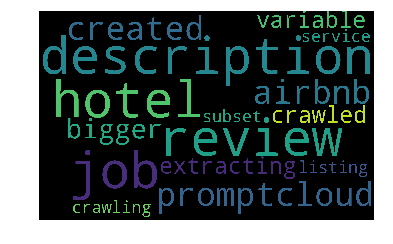

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

first_topic = nmf_model.components_[0]
first_topic_words = [tfidf.get_feature_names()[i] for i in first_topic.argsort()[:-15 - 1 :-1]]

firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=4000,
                          height=2500
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()